### 1. Importei as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importei os dados e verifiquei as 10 primeiras e últimas linhas do datase

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


### 3. Verifiquei o tamanho e o tipo de dados

In [5]:
tamanho = data.shape
tipo = data.dtypes
print(f'Tamanho: {tamanho}')
print(f'Tipos de dados por coluna: \n{tipo}')

Tamanho: (299, 13)
Tipos de dados por coluna: 
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


### 4. Verifiquei se existem dados faltantes

In [6]:
dados_faltantes = data.isnull().sum()
print(f'Dados faltantes por coluna: \n{dados_faltantes}')

Dados faltantes por coluna: 
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### 5. Verifiquei se existem dados duplicados

In [7]:
duplicados = data.duplicated().sum()
print(f'Existem {duplicados} dados duplicados')

Existem 0 dados duplicados


### 6. Verifiquei a correlação entre as variáveis utilizando um mapa de calor

<Axes: >

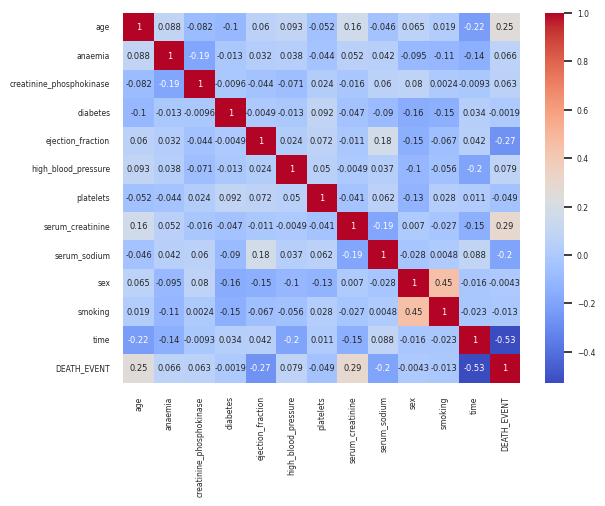

In [8]:
corr = data.corr()
sns.set(font_scale=0.5)
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Conclusão:** Não há correlação forte entre as variáveis, exceto entre 'serum_creatinine', 'ejection_fraction', 'age', 'serun_sodium' e 'time'.
**Correlação com a variável 'DEATH_EVENT'**
1. 'serum_creatinine': 0.29;
2. 'ejection_fraction': -0.27;
3. 'age': 0.25;
4. 'time': -0.53.
5. 'serum_sodium': -0.2;

### 7. Verifiquei a distribuição das variáveis importantes utilizando histogramas

<Axes: xlabel='DEATH_EVENT', ylabel='Count'>

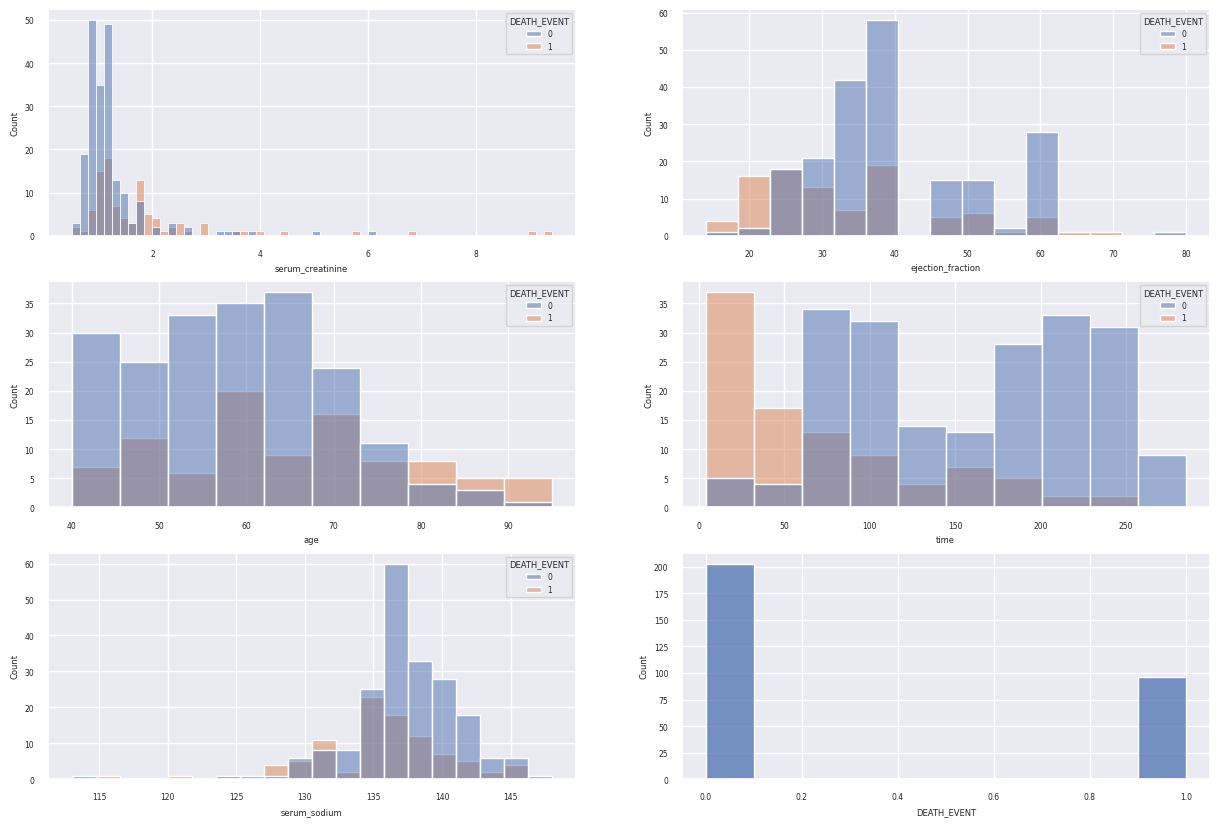

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(data=data, x='serum_creatinine', hue='DEATH_EVENT', ax=ax[0, 0])
sns.histplot(data=data, x='ejection_fraction', hue='DEATH_EVENT', ax=ax[0, 1])
sns.histplot(data=data, x='age', hue='DEATH_EVENT', ax=ax[1, 0])
sns.histplot(data=data, x='time', hue='DEATH_EVENT', ax=ax[1, 1])
sns.histplot(data=data, x='serum_sodium', hue='DEATH_EVENT', ax=ax[2, 0])
sns.histplot(data=data, x='DEATH_EVENT', ax=ax[2, 1])

**Conclusão:** As variáveis 'serum_creatinine', 'ejection_fraction', 'age', 'time'e 'serum_sodium' apresentam uma distribuição diferente entre os pacientes que morreram e os que sobreviveram.

### 8. Verifiquei a existência de outliers para as variáveis 'serum_creatinine', 'ejection_fraction', 'age', 'time' e 'serum_sodium'.

<Axes: xlabel='DEATH_EVENT'>

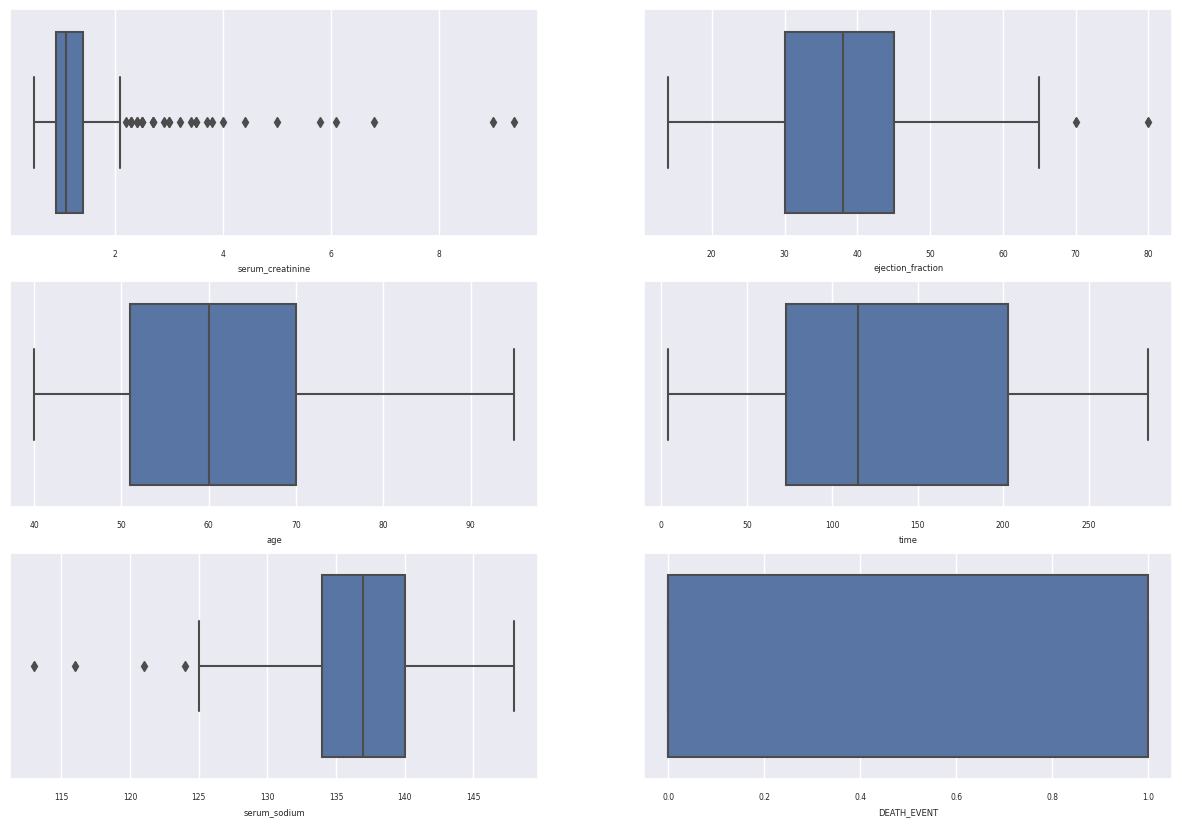

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(data=data, x='serum_creatinine', ax=ax[0, 0])
sns.boxplot(data=data, x='ejection_fraction', ax=ax[0, 1])
sns.boxplot(data=data, x='age', ax=ax[1, 0])
sns.boxplot(data=data, x='time', ax=ax[1, 1])
sns.boxplot(data=data, x='serum_sodium', ax=ax[2, 0])
sns.boxplot(data=data, x='DEATH_EVENT', ax=ax[2, 1])

**Conclusão:** As variáveis 'serum_creatinine', 'ejection_fraction', 'age', 'time' e 'serum_sodium' apresentam outliers.

### 9. Fiz a remoção dos outliers utilizando o método de Tukey

In [11]:
# removendo outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    df = df[(df[col] > lim_inf) & (df[col] < lim_sup)]
    return df


data = remove_outliers(data, 'ejection_fraction')
data = remove_outliers(data, 'serum_creatinine')
data = remove_outliers(data, 'serum_sodium')
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1
12,45.0,1,981,0,30,0,136000.00,1.1,137,1,0,11,1


### 10. Verifiquei novamente a existência de outliers para as variáveis 'serum_creatinine', 'ejection_fraction', 'age', 'time' e 'serum_sodium'.

<Axes: xlabel='serum_sodium'>

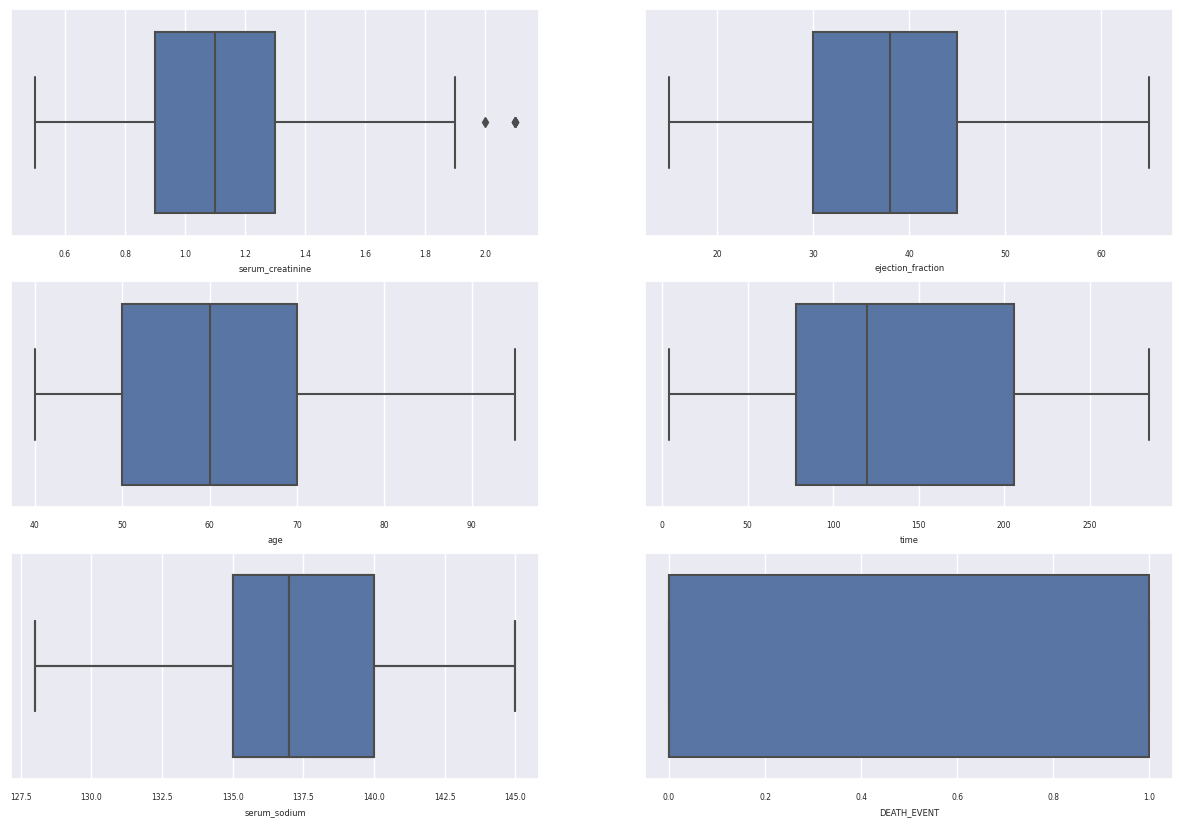

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(data=data, x='serum_creatinine', ax=ax[0, 0])
sns.boxplot(data=data, x='ejection_fraction', ax=ax[0, 1])
sns.boxplot(data=data, x='age', ax=ax[1, 0])
sns.boxplot(data=data, x='time', ax=ax[1, 1])
sns.boxplot(data=data, x='serum_sodium', ax=ax[2, 0])
sns.boxplot(data=data, x='DEATH_EVENT', ax=ax[2, 1])
sns.boxplot(data=data, x='serum_sodium', ax=ax[2, 0])

**Conclusão:** Os outliers foram removidos. Porém a variável 'serum_creatinine' ainda apresenta outliers.

### 11. Fiz a remoção dos outliers utilizando o método de Z-score

In [21]:
def remove_outliers_zscore(df, col):
    zscore = (df[col] - df[col].mean()) / df[col].std()
    df = df[(zscore > -3) & (zscore < 3)]
    return df

remove_outliers_zscore(data, 'serum_creatinine')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### 12. Verifiquei novamente a existência de outliers para as variáveis 'serum_creatinine', 'ejection_fraction', 'age', 'time' e 'serum_sodium' com boxplot.

<Axes: xlabel='serum_sodium'>

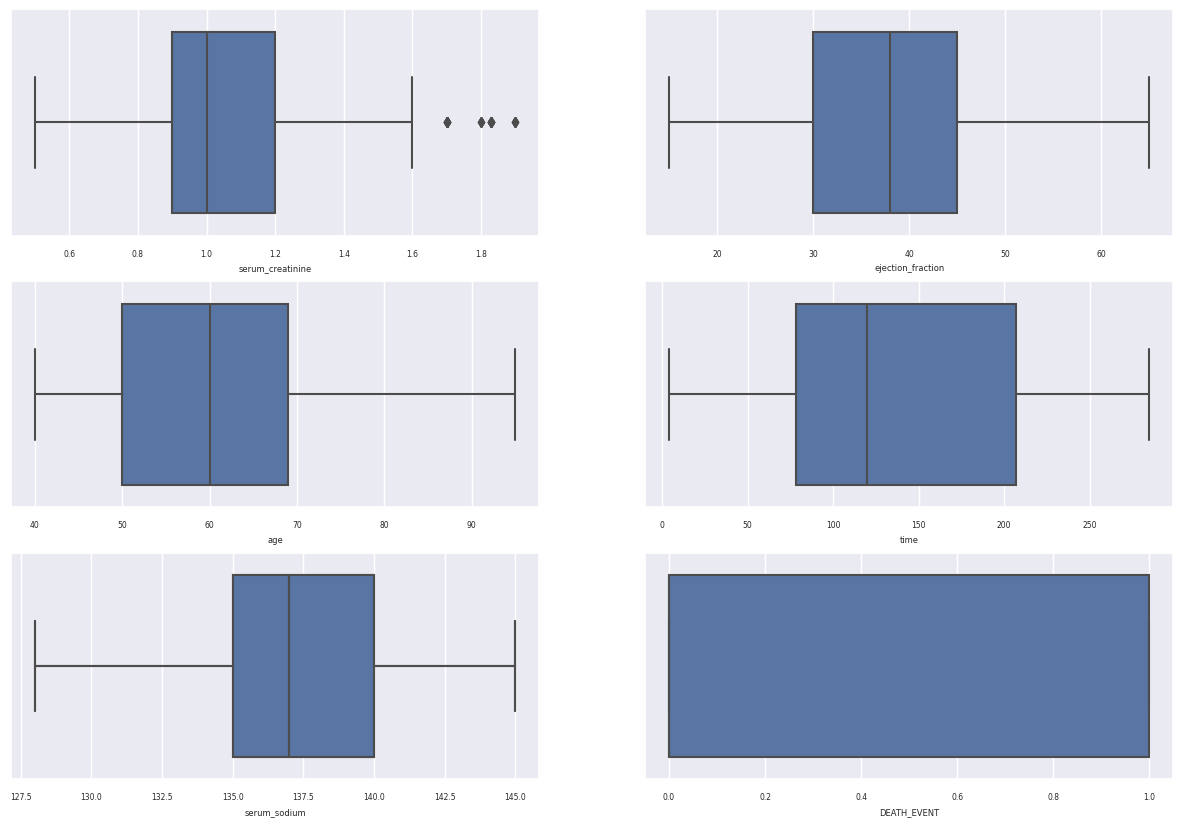

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(data=data, x='serum_creatinine', ax=ax[0, 0])
sns.boxplot(data=data, x='ejection_fraction', ax=ax[0, 1])
sns.boxplot(data=data, x='age', ax=ax[1, 0])
sns.boxplot(data=data, x='time', ax=ax[1, 1])
sns.boxplot(data=data, x='serum_sodium', ax=ax[2, 0])
sns.boxplot(data=data, x='DEATH_EVENT', ax=ax[2, 1])
sns.boxplot(data=data, x='serum_sodium', ax=ax[2, 0])

**Conclusão:** Decidi manter os outliers da variável 'serum_creatinine' pois a remoção destes valores pode gerar uma perda de informação.

### 13. Criei um novo dataframe com as variáveis 'serum_creatinine', 'ejection_fraction', 'age', 'time' e 'serum_sodium' e a variável alvo 'DEATH_EVENT'.

In [25]:
data_model = data[['serum_creatinine', 'ejection_fraction', 'age', 'time', 'serum_sodium', 'DEATH_EVENT']]
data_model.head(10)

,serum_creatinine,ejection_fraction,age,time,serum_sodium,DEATH_EVENT
0,1.9,20,75.0,4,130,1
1,1.1,38,55.0,6,136,1
2,1.3,20,65.0,7,129,1
3,1.9,20,50.0,7,137,1
6,1.2,15,75.0,10,137,1
7,1.1,60,60.0,10,131,1
8,1.5,65,65.0,10,138,1
11,0.9,25,62.0,10,140,1
12,1.1,30,45.0,11,137,1
13,1.1,38,50.0,11,137,1


### 14. Renomeei as colunas para facilitar a manipulação dos dados do modelo.

In [26]:
cols = ['creatinina_sérica', 'fração_injeção', 'idade', 'período_acompanhamento', 'sódio_sérico', 'morte']
data_model.columns = cols
data_model.head(10)

,creatinina_sérica,fração_injeção,idade,período_acompanhamento,sódio_sérico,morte
0,1.9,20,75.0,4,130,1
1,1.1,38,55.0,6,136,1
2,1.3,20,65.0,7,129,1
3,1.9,20,50.0,7,137,1
6,1.2,15,75.0,10,137,1
7,1.1,60,60.0,10,131,1
8,1.5,65,65.0,10,138,1
11,0.9,25,62.0,10,140,1
12,1.1,30,45.0,11,137,1
13,1.1,38,50.0,11,137,1


### 15. Exportei o dataframe para um arquivo csv.

In [27]:
data_model.to_csv('data_model.csv', index=False)